## Twitter Sentiment Data
Twitter is one of the most open platforms and that makes it a perfect fit for
analyzing text from different perspectives. Twitter has been used for predicting
election results, reputation management, brand monitoring, customer support,
various bots, etc.

## Twitter Corpora
Twitter has been noticed in the academic environment for a while now, and various
corpora from tweets have been created. Here are some of them:

- nltk.corpus.twitter_samples - Sentiment annotated tweets -
- Twitter Airline Reviews17
- First GOP Debate Twitter Sentiment18
- Sanders Analytics Twitter Sentiment Corpus19 - 5513 hand-classified tweets
- OSU Twitter NLP Tools20 - Contains POS, Chunk and NER annotated tweets
- Tweebank21 - Twitter CoNLL-like annotated data

## Other Sentiment Analysis Corpora
Besides the ones stated so far, there is a multitude of other corpora related to
sentiment analysis and I am going to list some of the most well-known:

- Sentiment Annotated 50.000 IMDB movie reviews22
- Amazon Fine Food Reviews23
- Multi-Domain Sentiment Dataset24
- UMICH SI650 - Sentiment Classification on Kaggle25
- SentiWordnet: Sentiment Polarities for Wordnet26
- Miscellaneous Opinion annotated datasets27


## Building a Tweets Dataset

Let’s start by gathering the Twitter data and putting it all together. We are going to
use three out of the six resources I have mentioned earlier in the Twitter Corpora
chapter: NLTK Twitter Samples, Twitter Airline Reviews and First GOP Debate
Twitter Sentiment.

**Indexing NLTK Twitter Samples**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a dataframe for storing tweets
df = pd.DataFrame(columns=['tweet', 'source', 'sentiment'])

####################################
#
# NLTK Twitter Samples
#
####################################
from nltk.corpus import twitter_samples

# Add the positive tweets
for tweet in twitter_samples.strings('positive_tweets.json'):
    df.loc[len(df)] = [tweet, 'nltk.corpus.twitter_samples', 'positive']

for tweet in twitter_samples.strings('negative_tweets.json'):
    df.loc[len(df)] = [tweet, 'nltk.corpus.twitter_samples', 'negative']

In [2]:
df.head()

,tweet,source,sentiment
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,nltk.corpus.twitter_samples,positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,nltk.corpus.twitter_samples,positive
2,@DespiteOfficial we had a listen last night :)...,nltk.corpus.twitter_samples,positive
3,@97sides CONGRATS :),nltk.corpus.twitter_samples,positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,nltk.corpus.twitter_samples,positive


For the next step, you need to download the Twitter Airline Reviews corpus from
Kaggle: https://www.kaggle.com/crowdflower/twitter-airline-sentiment28

**Indexing Twitter Airline Reviews**

In [3]:
####################################
#
# Twitter Airline Reviews
#
####################################
airline_tweets = pd.read_csv('data/Tweets.csv')
# Select only the columns of interest
airline_df = airline_tweets[['text', 'airline_sentiment']]
# Rename the columns to fit the header
airline_df = airline_df.rename(columns={'text': 'tweet', 'airline_sentiment': 'sentiment'})
# Add a constant column as the source
airline_df['source'] = 'https://www.kaggle.com/crowdflower/twitter-airline-sentiment'

In [5]:
airline_df.head()

,tweet,sentiment,source
0,@VirginAmerica What @dhepburn said.,neutral,https://www.kaggle.com/crowdflower/twitter-air...
1,@VirginAmerica plus you've added commercials t...,positive,https://www.kaggle.com/crowdflower/twitter-air...
2,@VirginAmerica I didn't today... Must mean I n...,neutral,https://www.kaggle.com/crowdflower/twitter-air...
3,@VirginAmerica it's really aggressive to blast...,negative,https://www.kaggle.com/crowdflower/twitter-air...
4,@VirginAmerica and it's a really big bad thing...,negative,https://www.kaggle.com/crowdflower/twitter-air...


Now let’s download the First GOP Debate Twitter Sentiment corpus from Kaggle and
process it as well: https://www.kaggle.com/crowdflower/first-gop-debate-twittersentiment29

**Indexing First GOP Debate Twitter Sentiment**

In [6]:
####################################
#
# First GOP Debate Twitter Sentiment
#
####################################
debate_tweets = pd.read_csv('data/Sentiment.csv')
# Select only the columns of interest
debate_df = debate_tweets[['text', 'sentiment']]
# Rename the columns to fit the header
debate_df = debate_df.rename(columns={'text': 'tweet'})
# Standardize the sentiment column
debate_df['sentiment'] = debate_df['sentiment'].apply(lambda s: s.lower())
# Add a constant column as the source
debate_df['source'] = 'https://www.kaggle.com/crowdflower/first-gop-debate-twitter-sentiment'

In [7]:
debate_df.head()

,tweet,sentiment,source
0,RT @NancyLeeGrahn: How did everyone feel about...,neutral,https://www.kaggle.com/crowdflower/first-gop-d...
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,positive,https://www.kaggle.com/crowdflower/first-gop-d...
2,RT @TJMShow: No mention of Tamir Rice and the ...,neutral,https://www.kaggle.com/crowdflower/first-gop-d...
3,RT @RobGeorge: That Carly Fiorina is trending ...,positive,https://www.kaggle.com/crowdflower/first-gop-d...
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,positive,https://www.kaggle.com/crowdflower/first-gop-d...


As a final step, let’s put everything together and see how many tweets we’ve got for
each polarity:

In [10]:
#Concatenate the data frames and bar plot
# Put everything together recomputing the index
df = pd.concat([df, airline_df, debate_df], ignore_index=True)

/home/frank/miniconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df.head()

,sentiment,source,tweet
0,positive,nltk.corpus.twitter_samples,#FollowFriday @France_Inte @PKuchly57 @Milipol...
1,positive,nltk.corpus.twitter_samples,@Lamb2ja Hey James! How odd :/ Please call our...
2,positive,nltk.corpus.twitter_samples,@DespiteOfficial we had a listen last night :)...
3,positive,nltk.corpus.twitter_samples,@97sides CONGRATS :)
4,positive,nltk.corpus.twitter_samples,yeaaaah yippppy!!! my accnt verified rqst has...


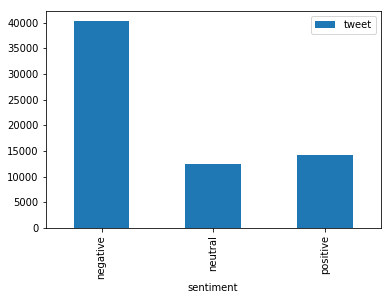

In [12]:
# Let's see how many positive/neutral/negative samples we've got
df[['tweet', 'sentiment']].groupby(['sentiment']).count().plot(kind='bar')
# Make sure the plot doesn't immediately disappear
plt.show(block=True)

In [13]:
print("Total tweets: ", len(df))
# Save all data to file
df.to_csv('twitter_sentiment_analysis.csv')

Total tweets:  67022


## Observations
- We gathered a good amount of tweets: 38.510.
- Data gathered comes from different areas: a great deal of them are either
political or customer interactions tweets.
- Missing neutral class: the NLTK annotated tweets don’t have a neutral class
which means there might be some tweets, at least in theory, that should be
classified as neutral.
- Dataset is rather unbalanced, skewed towards the negative class.


### Sentiment Analysis - A First Attempt
We now have the data all together, so let’s train a model to predict tweet sentiments
by taking the same approach as we did in the Text Analysis chapter.

**Training a Sentiment Classifier - First Attempt**

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [15]:
data = pd.read_csv('./twitter_sentiment_analysis.csv')

In [16]:
tweets = data['tweet'].values.astype(str)
sentiments = data['sentiment'].values.astype(str)
# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(tweets, sentiments,
test_size=0.2, shuffle=True)

vectorizer = CountVectorizer(lowercase=True)
# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)
print("Accuracy=", score)

Accuracy= 0.7579261469600895


I got an accuracy of around 0.71 (71%). It’s not bad, but there are some small
adjustments we can make to obtain better results. We’ll see how that goes in the
next chapters.

## Better Tokenization
*How does the Vectorizer transform text into words?* According to the documentation,
the vectorizer has two parameters of interest:

- tokenizer - a function that performs tokenization on a string.
- token_pattern - a regex for extracting tokens from a string. (this is a fallback in
case no tokenizer function was provided)

Let’s take the default value for the token_pattern which is r"(?u)\b\w\w+\b". and see
how it performs on this tweet:

>@BeaMiller u didn’t follow me :((

**Bad Tweet Tokenization**


In [18]:
import re
import nltk
tweet = "@BeaMiller u didn't follow me :(("

In [19]:
print(re.findall(r"(?u)\b\w\w+\b", tweet))
# ['BeaMiller', 'didn', 'follow', 'me']

['BeaMiller', 'didn', 'follow', 'me']


In [20]:
print(nltk.word_tokenize(tweet))
# ['@', 'BeaMiller', 'u', 'did', "n't", 'follow', 'me', ':', '(', '(']

['@', 'BeaMiller', 'u', 'did', "n't", 'follow', 'me', ':', '(', '(']


We’ve tried both the regex token pattern and the nltk.word_tokenize, but we did
not get satisfactory results: none of them caught the emoticon (which is a huge
sentiment indicator) or the Twitter handle (which has no sentiment value).
Feel free to build a better performing regex, as it would be a good exercise at this
point.
Moving forward, let’s use another tokenizer that comes bundled with NLTK and see
how it performs: `nltk.tokenize.TweetTokenizer`

**NLTK Tweet Tokenization**

In [21]:
from nltk.tokenize.casual import TweetTokenizer
tweet = "@BeaMiller u didn't follow me :(("
tokenizer = TweetTokenizer()

In [22]:
print(tokenizer.tokenize(tweet))
# ['@BeaMiller', 'u', "didn't", 'follow', 'me', ':(', '(']

['@BeaMiller', 'u', "didn't", 'follow', 'me', ':(', '(']


In [23]:
tokenizer = TweetTokenizer(strip_handles=True)
print(tokenizer.tokenize(tweet))
# ['u', "didn't", 'follow', 'me', ':(', '(']

['u', "didn't", 'follow', 'me', ':(', '(']


As you can see, it’s not perfect, but it’s slightly better. Let’s try our new fancy
tokenizer for the sentiment analysis task and see where it takes us:

**Better Tweet Tokenization**


In [24]:
from nltk.tokenize.casual import TweetTokenizer
tweet_tokenizer = TweetTokenizer(strip_handles=True)

tweets = data['tweet'].values.astype(str)
sentiments = data['sentiment'].values.astype(str)
# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(tweets, sentiments,
test_size=0.2, shuffle=True)



vectorizer = CountVectorizer(lowercase=True, tokenizer=tweet_tokenizer.tokenize)
# ...

In [25]:


# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)
print("Accuracy=", score)

Accuracy= 0.8039537486012682


I got around 0.80 accuracy (80%)! That a huge boost in accuracy with a very small
adjustment. Pretty cool :)!